In [2]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import layers, Sequential

#### Load Data

In [3]:
(train_images, train_labels), _ = mnist.load_data()

##### 백색 잡음 픽셀, 0픽셀 추가

In [4]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
train_images_with_noise_channels = np.concatenate([
    train_images, np.random.random((len(train_images), 784))
], axis=1)
train_images_with_zeros_channels = np.concatenate([
    train_images, np.zeros((len(train_images), 784))
], axis=1)

##### 모델 훈련

In [5]:
import models_function

In [6]:
model = models_function.get_relu_softmax()

In [7]:
history_noise = model.fit(train_images_with_noise_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
  1/375 [..............................] - ETA: 1:02 - loss: 2.5345 - accuracy: 0.0938

2023-07-17 12:11:18.276944: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


375/375 [==============================] - 2s 5ms/step - loss: 0.6012 - accuracy: 0.8135 - val_loss: 0.3203 - val_accuracy: 0.9003
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2451 - accuracy: 0.9235 - val_loss: 0.1624 - val_accuracy: 0.9521
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1561 - accuracy: 0.9522 - val_loss: 0.1935 - val_accuracy: 0.9408
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1116 - accuracy: 0.9658 - val_loss: 0.1704 - val_accuracy: 0.9497
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0821 - accuracy: 0.9737 - val_loss: 0.1704 - val_accuracy: 0.9513
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0601 - accuracy: 0.9808 - val_loss: 0.1322 - val_accuracy: 0.9625
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0444 - accuracy: 0.9859 - val_loss: 0.1186 - val_accuracy: 0.9682
Epoch 8/10
375/37

In [8]:
model = models_function.get_relu_softmax() # reset model
history_zeros = model.fit(train_images_with_noise_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6039 - accuracy: 0.8149 - val_loss: 0.3935 - val_accuracy: 0.8769
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2502 - accuracy: 0.9221 - val_loss: 0.3072 - val_accuracy: 0.9036
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1635 - accuracy: 0.9500 - val_loss: 0.1593 - val_accuracy: 0.9532
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1160 - accuracy: 0.9641 - val_loss: 0.1484 - val_accuracy: 0.9552
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0851 - accuracy: 0.9738 - val_loss: 0.1496 - val_accuracy: 0.9582
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0641 - accuracy: 0.9796 - val_loss: 0.1106 - val_accuracy: 0.9689
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.1184 - val_accuracy: 0.9689
Epoch 

#### History 시각화

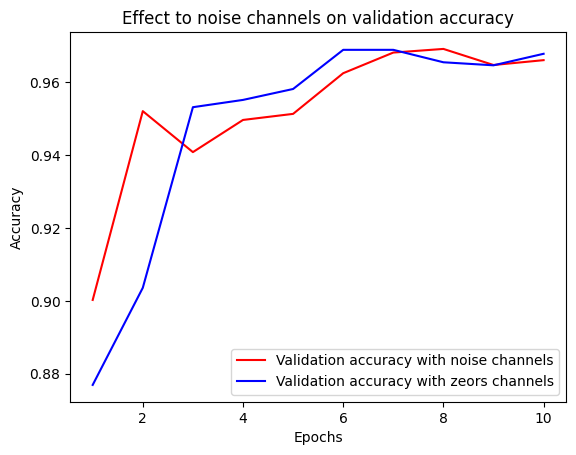

In [9]:
val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, val_acc_noise, 'r-', label = 'Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b-', label = 'Validation accuracy with zeors channels')
plt.title('Effect to noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#### 일반화

##### learning with random lable

In [10]:
(trian_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = models_function.get_relu_softmax()

In [11]:
h = model.fit(train_images, random_train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3017 - accuracy: 0.1115 - val_loss: 2.3019 - val_accuracy: 0.1142
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3012 - accuracy: 0.1120 - val_loss: 2.3013 - val_accuracy: 0.1138
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3011 - accuracy: 0.1126 - val_loss: 2.3012 - val_accuracy: 0.1139
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3007 - accuracy: 0.1131 - val_loss: 2.3017 - val_accuracy: 0.1103
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3004 - accuracy: 0.1136 - val_loss: 2.3010 - val_accuracy: 0.1118
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3001 - accuracy: 0.1131 - val_loss: 2.3013 - val_accuracy: 0.1117
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2997 - accuracy: 0.1124 - val_loss: 2.3019 - val_accuracy: 0.1115
Epoch 

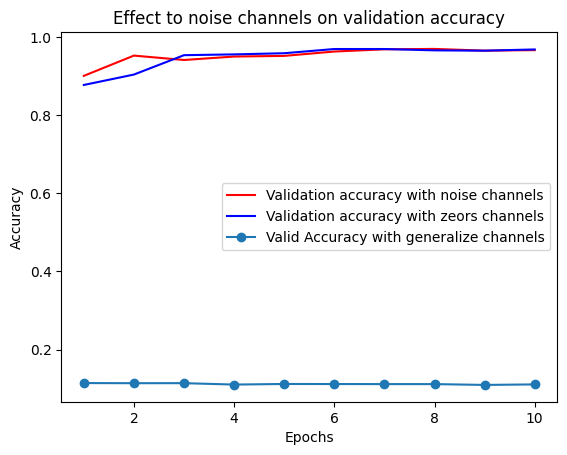

In [12]:
val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
vall_acc_general = h.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, val_acc_noise, 'r-', label = 'Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b-', label = 'Validation accuracy with zeors channels')
plt.plot(epochs, vall_acc_general, 'o-', label = 'Valid Accuracy with generalize channels')
plt.title('Effect to noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#### 훈련성능 향상

##### 경사하강법

In [13]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

model = models_function.get_relu_softmax2(1.0)
hist = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 76.8360 - accuracy: 0.2312 - val_loss: 2.3614 - val_accuracy: 0.1622
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 2.5211 - accuracy: 0.1283 - val_loss: 2.3427 - val_accuracy: 0.1050
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 2.3316 - accuracy: 0.1119 - val_loss: 2.2826 - val_accuracy: 0.1215
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 2.3438 - accuracy: 0.1333 - val_loss: 2.3300 - val_accuracy: 0.1102
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 2.3475 - accuracy: 0.1042 - val_loss: 2.3619 - val_accuracy: 0.0925
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 2.3461 - accuracy: 0.1021 - val_loss: 2.3648 - val_accuracy: 0.0998
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 2.3430 - accuracy: 0.1007 - val_loss: 2.3205 - val_accuracy: 0.1070
Epoch

In [14]:
model = models_function.get_relu_softmax2(1e-2)
hist_1e = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2209 - accuracy: 0.9327 - val_loss: 0.1360 - val_accuracy: 0.9582
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1130 - accuracy: 0.9655 - val_loss: 0.1398 - val_accuracy: 0.9612
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0857 - accuracy: 0.9736 - val_loss: 0.1123 - val_accuracy: 0.9719
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.9769 - val_loss: 0.1544 - val_accuracy: 0.9651
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0727 - accuracy: 0.9796 - val_loss: 0.1554 - val_accuracy: 0.9645
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0642 - accuracy: 0.9816 - val_loss: 0.1629 - val_accuracy: 0.9674
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0605 - accuracy: 0.9834 - val_loss: 0.1630 - val_accuracy: 0.9672
Epoch 

In [15]:
model = models_function.get_relu_softmax2(0.1)
hist_01 = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


375/375 [==============================] - 1s 2ms/step - loss: 1.4567 - accuracy: 0.8497 - val_loss: 0.4122 - val_accuracy: 0.8943
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.4191 - accuracy: 0.9008 - val_loss: 0.4061 - val_accuracy: 0.9055
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.4470 - accuracy: 0.8971 - val_loss: 0.4087 - val_accuracy: 0.9127
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.4455 - accuracy: 0.8937 - val_loss: 0.4861 - val_accuracy: 0.8810
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.5345 - accuracy: 0.8740 - val_loss: 0.6168 - val_accuracy: 0.8788
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.6009 - accuracy: 0.8596 - val_loss: 0.6198 - val_accuracy: 0.8658
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.6032 - accuracy: 0.8452 - val_loss: 0.8098 - val_accuracy: 0.7845
Epoch 8/10
375/37

In [16]:
model = models_function.get_relu_softmax2(0.01)
hist_001 = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2334 - accuracy: 0.9289 - val_loss: 0.1424 - val_accuracy: 0.9599
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1170 - accuracy: 0.9641 - val_loss: 0.1445 - val_accuracy: 0.9631
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0876 - accuracy: 0.9729 - val_loss: 0.1459 - val_accuracy: 0.9632
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.9765 - val_loss: 0.1710 - val_accuracy: 0.9588
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0737 - accuracy: 0.9788 - val_loss: 0.1856 - val_accuracy: 0.9614
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0578 - accuracy: 0.9834 - val_loss: 0.1661 - val_accuracy: 0.9693
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0626 - accuracy: 0.9827 - val_loss: 0.2020 - val_accuracy: 0.9612
Epoch 

In [17]:
model = models_function.get_relu_softmax2(0.001)
hist_0001 = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


375/375 [==============================] - 1s 2ms/step - loss: 0.2968 - accuracy: 0.9156 - val_loss: 0.1544 - val_accuracy: 0.9563
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1236 - accuracy: 0.9644 - val_loss: 0.1150 - val_accuracy: 0.9661
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0814 - accuracy: 0.9764 - val_loss: 0.0934 - val_accuracy: 0.9732
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0567 - accuracy: 0.9836 - val_loss: 0.0809 - val_accuracy: 0.9757
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0419 - accuracy: 0.9884 - val_loss: 0.0778 - val_accuracy: 0.9759
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0312 - accuracy: 0.9911 - val_loss: 0.0778 - val_accuracy: 0.9771
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0231 - accuracy: 0.9939 - val_loss: 0.0772 - val_accuracy: 0.9767
Epoch 8/10
375/37

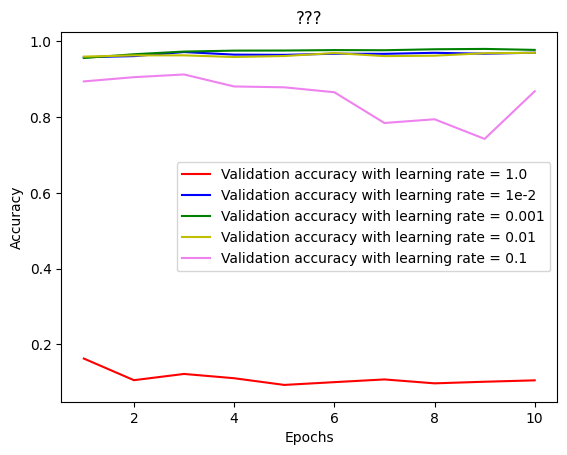

In [18]:
val_acc_1 = hist.history['val_accuracy']
val_acc_1e = hist_1e.history['val_accuracy']
val_acc_0001 = hist_0001.history['val_accuracy']
val_acc_001 = hist_001.history['val_accuracy']
val_acc_01 = hist_01.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, val_acc_1, 'r-', label = 'Validation accuracy with learning rate = 1.0')
plt.plot(epochs, val_acc_1e, 'b-', label = 'Validation accuracy with learning rate = 1e-2')
plt.plot(epochs, val_acc_0001, 'g-', label = 'Validation accuracy with learning rate = 0.001')
plt.plot(epochs, val_acc_001, 'y-', label = 'Validation accuracy with learning rate = 0.01')
plt.plot(epochs, val_acc_01, 'violet', label = 'Validation accuracy with learning rate = 0.1')
plt.title('???')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

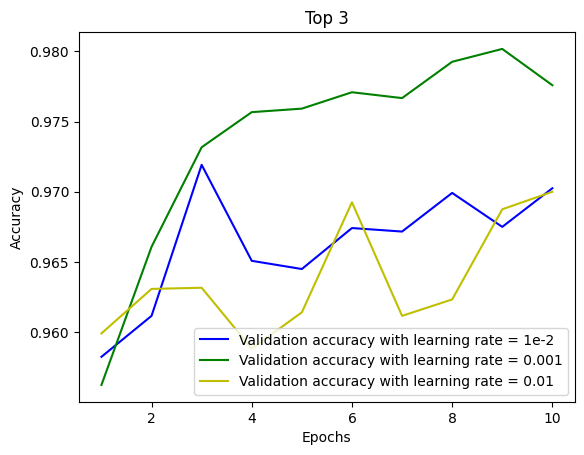

In [19]:
val_acc_1e = hist_1e.history['val_accuracy']
val_acc_0001 = hist_0001.history['val_accuracy']
val_acc_001 = hist_001.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, val_acc_1e, 'b-', label = 'Validation accuracy with learning rate = 1e-2')
plt.plot(epochs, val_acc_0001, 'g-', label = 'Validation accuracy with learning rate = 0.001')
plt.plot(epochs, val_acc_001, 'y-', label = 'Validation accuracy with learning rate = 0.01')
plt.title('Top 3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

##### 모델 용량 늘리기

In [20]:
model = models_function.large_model_creation(1)
history_small_model = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 0s 833us/step - loss: 0.6835 - accuracy: 0.8274 - val_loss: 0.3625 - val_accuracy: 0.9043
Epoch 2/20
375/375 [==============================] - 0s 679us/step - loss: 0.3529 - accuracy: 0.9027 - val_loss: 0.3093 - val_accuracy: 0.9138
Epoch 3/20
375/375 [==============================] - 0s 872us/step - loss: 0.3166 - accuracy: 0.9115 - val_loss: 0.2899 - val_accuracy: 0.9197
Epoch 4/20
375/375 [==============================] - 0s 857us/step - loss: 0.3001 - accuracy: 0.9159 - val_loss: 0.2811 - val_accuracy: 0.9226
Epoch 5/20
375/375 [==============================] - 0s 731us/step - loss: 0.2900 - accuracy: 0.9183 - val_loss: 0.2739 - val_accuracy: 0.9252
Epoch 6/20
375/375 [==============================] - 0s 677us/step - loss: 0.2834 - accuracy: 0.9216 - val_loss: 0.2707 - val_accuracy: 0.9245
Epoch 7/20
375/375 [==============================] - 0s 656us/step - loss: 0.2784 - accuracy: 0.9225 - val_loss: 0.2711 - val_accuracy:

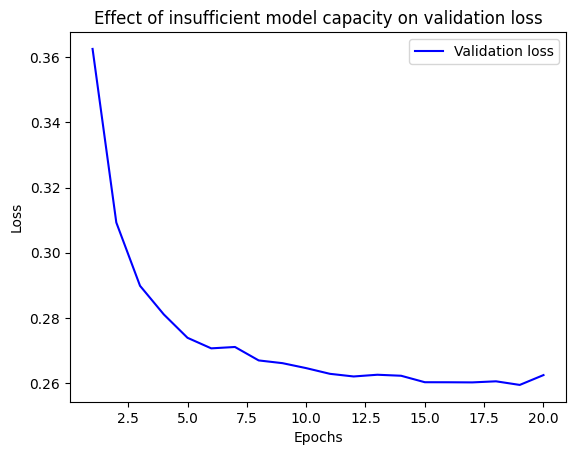

In [21]:
val_loss = history_small_model.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [22]:
model = models_function.large_model_creation(2)
history_large_model = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20


375/375 [==============================] - 1s 2ms/step - loss: 0.3643 - accuracy: 0.8963 - val_loss: 0.1978 - val_accuracy: 0.9398
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1642 - accuracy: 0.9509 - val_loss: 0.1482 - val_accuracy: 0.9549
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1158 - accuracy: 0.9656 - val_loss: 0.1177 - val_accuracy: 0.9660
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.9734 - val_loss: 0.1077 - val_accuracy: 0.9684
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9778 - val_loss: 0.1071 - val_accuracy: 0.9688
Epoch 6/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0584 - accuracy: 0.9823 - val_loss: 0.0964 - val_accuracy: 0.9722
Epoch 7/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0491 - accuracy: 0.9855 - val_loss: 0.0961 - val_accuracy: 0.9741
Epoch 8/20
375/37

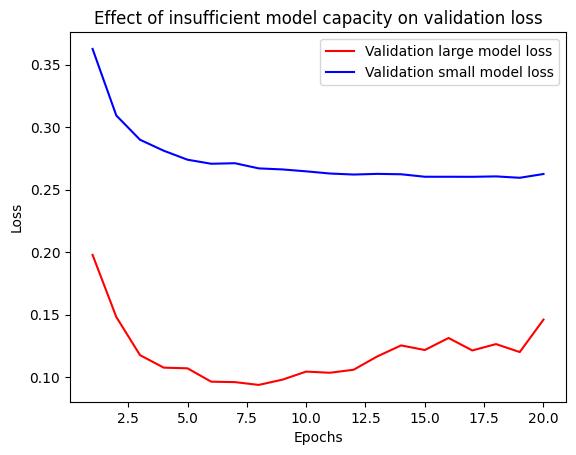

In [23]:
val_large_loss = history_large_model.history['val_loss']
val_small_loss = history_small_model.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, val_large_loss, 'r-', label='Validation large model loss')
plt.plot(epochs, val_small_loss, 'b-', label='Validation small model loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#### 일반화 성능 향상

##### 모델 규제

In [24]:
import vectorize
from keras.datasets import imdb

In [31]:
(train_data, train_labels), _ = imdb.load_data(num_words=10000)
train_data.shape

(25000,)

In [32]:
train_data = vectorize.vectorize_sequences(train_data)
train_data.shape

(25000, 10000)

Original model

In [27]:
model = models_function.get_relu_sigmoid(16,16,1)
history_original = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5256 - accuracy: 0.7883 - val_loss: 0.3967 - val_accuracy: 0.8738
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: 0.3201 - accuracy: 0.9019 - val_loss: 0.3088 - val_accuracy: 0.8900
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2306 - accuracy: 0.9271 - val_loss: 0.2920 - val_accuracy: 0.8854
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1811 - accuracy: 0.9430 - val_loss: 0.2717 - val_accuracy: 0.8933
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1452 - accuracy: 0.9561 - val_loss: 0.2787 - val_accuracy: 0.8907
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1214 - accuracy: 0.9617 - val_loss: 0.2900 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1007 - accuracy: 0.9691 - val_loss: 0.3103 - val_accuracy: 0.8844
Epoch 8/20
30/30 [=

Smaller model

In [28]:
model = models_function.get_relu_sigmoid(4,4,1)
history_smaller_model = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 11ms/step - loss: 0.6461 - accuracy: 0.5995 - val_loss: 0.5953 - val_accuracy: 0.6508
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: 0.5590 - accuracy: 0.7370 - val_loss: 0.5390 - val_accuracy: 0.7737
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.5074 - accuracy: 0.8178 - val_loss: 0.5081 - val_accuracy: 0.8292
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4712 - accuracy: 0.8653 - val_loss: 0.5026 - val_accuracy: 0.7766
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4439 - accuracy: 0.8896 - val_loss: 0.4839 - val_accuracy: 0.8104
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4213 - accuracy: 0.9084 - val_loss: 0.4601 - val_accuracy: 0.8579
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4020 - accuracy: 0.9255 - val_loss: 0.4510 - val_accuracy: 0.8646
Epoch 8/20
30/30 [=

Larger model

In [29]:
model = models_function.get_relu_sigmoid(512,512,1)
history_larger_model = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5493 - accuracy: 0.7458 - val_loss: 0.2980 - val_accuracy: 0.8805
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2568 - accuracy: 0.8967 - val_loss: 0.2895 - val_accuracy: 0.8834
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1525 - accuracy: 0.9463 - val_loss: 0.3102 - val_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0683 - accuracy: 0.9751 - val_loss: 0.3660 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1473 - accuracy: 0.9720 - val_loss: 0.3226 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0062 - accuracy: 0.9995 - val_loss: 0.4953 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 9.4172e-04 - accuracy: 0.9999 - val_loss: 0.6126 - val_accuracy: 0.8864
Epoch 8/2

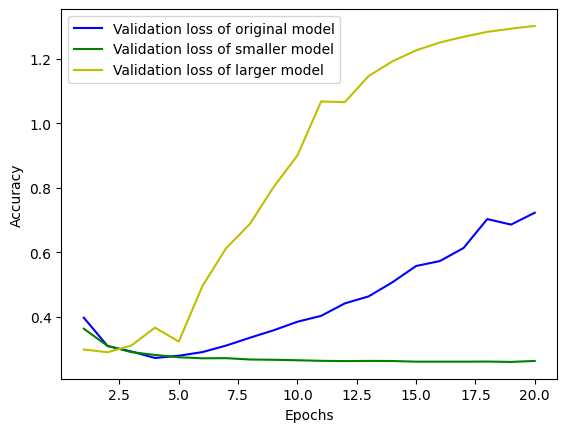

In [30]:
val_loss_original = history_original.history['val_loss']
val_loss_smaller = history_small_model.history['val_loss']
val_loss_larger = history_larger_model.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, val_loss_original, 'b-', label = 'Validation loss of original model')
plt.plot(epochs, val_loss_smaller, 'g-', label = 'Validation loss of smaller model')
plt.plot(epochs, val_loss_larger, 'y-', label = 'Validation loss of larger model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

가중치 규제

In [33]:
from tensorflow.keras import regularizers

In [34]:
# L2 Regularize
model = Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_l2_reg = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5941 - accuracy: 0.7821 - val_loss: 0.4662 - val_accuracy: 0.8696
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3991 - accuracy: 0.8942 - val_loss: 0.4025 - val_accuracy: 0.8714
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.3306 - accuracy: 0.9128 - val_loss: 0.3865 - val_accuracy: 0.8731
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2994 - accuracy: 0.9239 - val_loss: 0.3637 - val_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2798 - accuracy: 0.9305 - val_loss: 0.3649 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2649 - accuracy: 0.9367 - val_loss: 0.3590 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2557 - accuracy: 0.9402 - val_loss: 0.3608 - val_accuracy: 0.8862
Epoch 8/20
30/30 [=

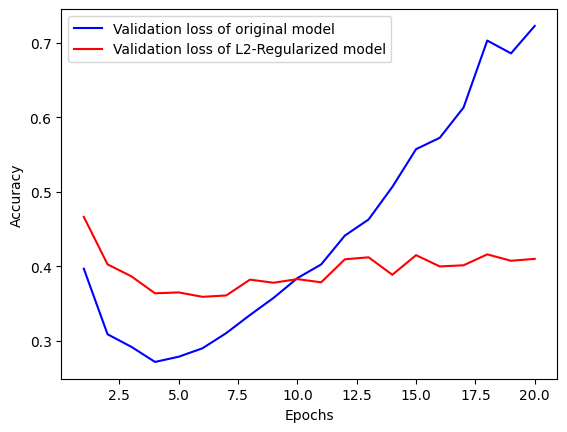

In [35]:
val_loss_original = history_original.history['val_loss']
val_loss_l2 = history_l2_reg.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, val_loss_original, 'b-', label = 'Validation loss of original model')
plt.plot(epochs, val_loss_l2, 'r-', label = 'Validation loss of L2-Regularized model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [36]:
# L1 Regularize
model = Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l1(0.002), activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l1(0.002), activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_l1_reg = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 15ms/step - loss: 1.5103 - accuracy: 0.7294 - val_loss: 0.8624 - val_accuracy: 0.8237
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 0.8256 - accuracy: 0.8202 - val_loss: 0.8032 - val_accuracy: 0.8457
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.7775 - accuracy: 0.8339 - val_loss: 0.7684 - val_accuracy: 0.8420
Epoch 4/20
30/30 [==============================] - 0s 7ms/step - loss: 0.7390 - accuracy: 0.8475 - val_loss: 0.7351 - val_accuracy: 0.8539
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.7152 - accuracy: 0.8523 - val_loss: 0.7128 - val_accuracy: 0.8515
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.6954 - accuracy: 0.8549 - val_loss: 0.7012 - val_accuracy: 0.8510
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.6816 - accuracy: 0.8575 - val_loss: 0.6800 - val_accuracy: 0.8585
Epoch 8/20
30/30 [=

In [37]:
# L1 L2 Regularize
model = Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l1_l2(0.002), activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l1_l2(0.002), activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_l1l2_reg = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 15ms/step - loss: 1.7315 - accuracy: 0.6806 - val_loss: 1.0504 - val_accuracy: 0.7295
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 0.9933 - accuracy: 0.7949 - val_loss: 0.9835 - val_accuracy: 0.8010
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.9298 - accuracy: 0.8151 - val_loss: 0.9171 - val_accuracy: 0.8282
Epoch 4/20
30/30 [==============================] - 0s 7ms/step - loss: 0.8895 - accuracy: 0.8223 - val_loss: 0.8929 - val_accuracy: 0.8092
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 0.8546 - accuracy: 0.8283 - val_loss: 0.8457 - val_accuracy: 0.8389
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.8237 - accuracy: 0.8333 - val_loss: 0.8644 - val_accuracy: 0.7983
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.8033 - accuracy: 0.8367 - val_loss: 0.8388 - val_accuracy: 0.7960
Epoch 8/20
30/30 [=

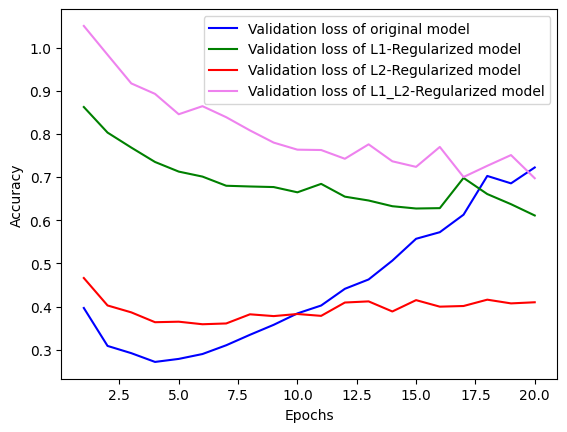

In [38]:
val_loss_original = history_original.history['val_loss']
val_loss_l2 = history_l2_reg.history['val_loss']
val_loss_l1 = history_l1_reg.history['val_loss']
val_loss_l1l2 = history_l1l2_reg.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, val_loss_original, 'b-', label = 'Validation loss of original model')
plt.plot(epochs, val_loss_l1, 'green', label = 'Validation loss of L1-Regularized model')
plt.plot(epochs, val_loss_l2, 'r-', label = 'Validation loss of L2-Regularized model')
plt.plot(epochs, val_loss_l1l2, 'violet', label = 'Validation loss of L1_L2-Regularized model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Dropout

In [42]:
model = Sequential([
            layers.Dense(16, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(16, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(1, activation='sigmoid'),
            layers.Dropout(0.5)
        ])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_dropout = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 15ms/step - loss: 4.6671 - accuracy: 0.5247 - val_loss: 0.7081 - val_accuracy: 0.5033
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: 4.3469 - accuracy: 0.5701 - val_loss: 0.6424 - val_accuracy: 0.5044
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 4.3135 - accuracy: 0.5943 - val_loss: 0.6101 - val_accuracy: 0.5144
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 4.2385 - accuracy: 0.6192 - val_loss: 0.5831 - val_accuracy: 0.5356
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 4.1718 - accuracy: 0.6394 - val_loss: 0.5955 - val_accuracy: 0.5383
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 4.1134 - accuracy: 0.6575 - val_loss: 0.5497 - val_accuracy: 0.5334
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 4.0712 - accuracy: 0.6671 - val_loss: 0.6025 - val_accuracy: 0.5249
Epoch 8/20
30/30 [=

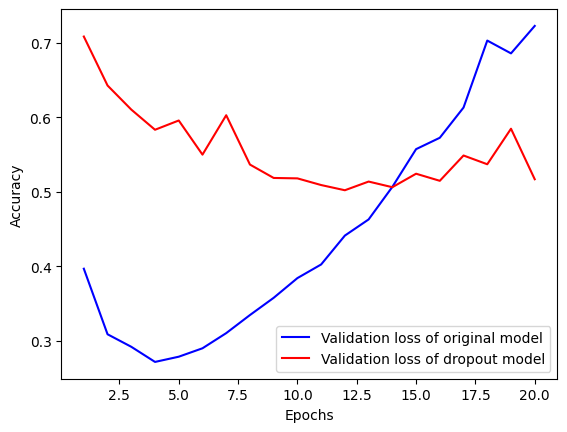

In [43]:
val_loss_original = history_original.history['val_loss']
val_loss_dropout = history_dropout.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, val_loss_original, 'b-', label = 'Validation loss of original model')
plt.plot(epochs, val_loss_dropout, 'r-', label = 'Validation loss of dropout model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

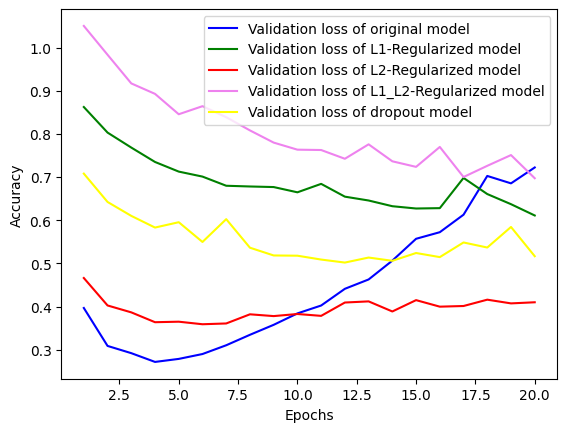

In [44]:
val_loss_original = history_original.history['val_loss']
val_loss_l2 = history_l2_reg.history['val_loss']
val_loss_l1 = history_l1_reg.history['val_loss']
val_loss_l1l2 = history_l1l2_reg.history['val_loss']
val_loss_dropout = history_dropout.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, val_loss_original, 'b-', label = 'Validation loss of original model')
plt.plot(epochs, val_loss_l1, 'green', label = 'Validation loss of L1-Regularized model')
plt.plot(epochs, val_loss_l2, 'r-', label = 'Validation loss of L2-Regularized model')
plt.plot(epochs, val_loss_l1l2, 'violet', label = 'Validation loss of L1_L2-Regularized model')
plt.plot(epochs, val_loss_dropout, 'yellow', label = 'Validation loss of dropout model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()